### Setup and Install OpenAI

In [1]:
!pip -qq install openai

In [2]:
import os
import sys
import openai

In [ ]:
# openai.api_type = "azure"
# openai.api_base = "https://dotdotdot.openai.azure.com/"
# openai.api_version = "2022-12-01"
# openai.api_key = "234863794673866"

In [3]:
openai.api_type = "azure"
openai.api_base = "https://dotdotdot.openai.azure.com/"
openai.api_key =  "234863794673866"
openai.api_version = "2022-12-01"

### Actual Data

In [4]:
import pandas as pd
# orig_df = pd.read_csv("/content/drive/MyDrive/Research_paper_Work/Original_dataset_sdn.csv",sep=";")
orig_df = pd.read_csv("cleaned_OriginalData.csv")
orig_df.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0


In [5]:
orig_df.isna().sum()

dt             0
switch         0
src            0
dst            0
pktcount       0
bytecount      0
dur            0
dur_nsec       0
tot_dur        0
flows          0
packetins      0
pktperflow     0
byteperflow    0
pktrate        0
Pairflow       0
Protocol       0
port_no        0
tx_bytes       0
rx_bytes       0
tx_kbps        0
rx_kbps        0
tot_kbps       0
label          0
dtype: int64

In [ ]:
orig_df.dropna(inplace=True)

In [ ]:
orig_df.isna().sum()

In [ ]:
orig_df.to_csv("cleaned_OriginalData.csv",index=False)

In [ ]:
orig_df.describe()

In [ ]:
ex1 = ""
for i in orig_df.iloc[:3,:].values:
  print(i)
  combined = ",".join(str(i))
  print(combined)
  ex1 += combined+" /n"

[11425 1 '10.0.0.1' '10.0.0.8' 45304 48294064 100 716000000 101000000000.0
 3 1943 13535 14428310 451 0 'UDP' 3 143928631 3917 0 0.0 0.0 0]
[,1,1,4,2,5, ,1, ,',1,0,.,0,.,0,.,1,', ,',1,0,.,0,.,0,.,8,', ,4,5,3,0,4, ,4,8,2,9,4,0,6,4, ,1,0,0, ,7,1,6,0,0,0,0,0,0, ,1,0,1,0,0,0,0,0,0,0,0,0,.,0,
, ,3, ,1,9,4,3, ,1,3,5,3,5, ,1,4,4,2,8,3,1,0, ,4,5,1, ,0, ,',U,D,P,', ,3, ,1,4,3,9,2,8,6,3,1, ,3,9,1,7, ,0, ,0,.,0, ,0,.,0, ,0,]
[11605 1 '10.0.0.1' '10.0.0.8' 126395 134737070 280 734000000
 281000000000.0 2 1943 13531 14424046 451 0 'UDP' 4 3842 3520 0 0.0 0.0 0]
[,1,1,6,0,5, ,1, ,',1,0,.,0,.,0,.,1,', ,',1,0,.,0,.,0,.,8,', ,1,2,6,3,9,5, ,1,3,4,7,3,7,0,7,0, ,2,8,0, ,7,3,4,0,0,0,0,0,0,
, ,2,8,1,0,0,0,0,0,0,0,0,0,.,0, ,2, ,1,9,4,3, ,1,3,5,3,1, ,1,4,4,2,4,0,4,6, ,4,5,1, ,0, ,',U,D,P,', ,4, ,3,8,4,2, ,3,5,2,0, ,0, ,0,.,0, ,0,.,0, ,0,]
[11425 1 '10.0.0.2' '10.0.0.8' 90333 96294978 200 744000000 201000000000.0
 3 1943 13534 14427244 451 0 'UDP' 1 3795 1242 0 0.0 0.0 0]
[,1,1,4,2,5, ,1, ,',1,0,.,0,.,0,.,2,',

In [ ]:
col_line = ", ".join(orig_df.columns)+"/n"

In [ ]:
ex1 = """11425, 1, '10.0.0.1', '10.0.0.8', 45304, 48294064, 100,716000000, 101000000000.0, 3, 1943, 13535, 14428310, 451, 0,'UDP', 3, 143928631, 3917, 0, 0.0, 0.0, 0"""
"""11605, 1, '10.0.0.1', '10.0.0.8', 126395, 134737070, 280,734000000, 281000000000.0, 2, 1943, 13531, 14424046, 451, 0,'UDP', 4, 3842, 3520, 0, 0.0, 0.0, 0
11425, 1, '10.0.0.2', '10.0.0.8', 90333, 96294978, 200,744000000, 201000000000.0, 3, 1943, 13534, 14427244, 451, 0,'UDP', 1, 3795, 1242, 0, 0.0, 0.0, 0"""

"11605, 1, '10.0.0.1', '10.0.0.8', 126395, 134737070, 280,734000000, 281000000000.0, 2, 1943, 13531, 14424046, 451, 0,'UDP', 4, 3842, 3520, 0, 0.0, 0.0, 0\n11425, 1, '10.0.0.2', '10.0.0.8', 90333, 96294978, 200,744000000, 201000000000.0, 3, 1943, 13534, 14427244, 451, 0,'UDP', 1, 3795, 1242, 0, 0.0, 0.0, 0"

<ipython-input-11-09042600b1ab>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(orig_df.corr(),annot=True);


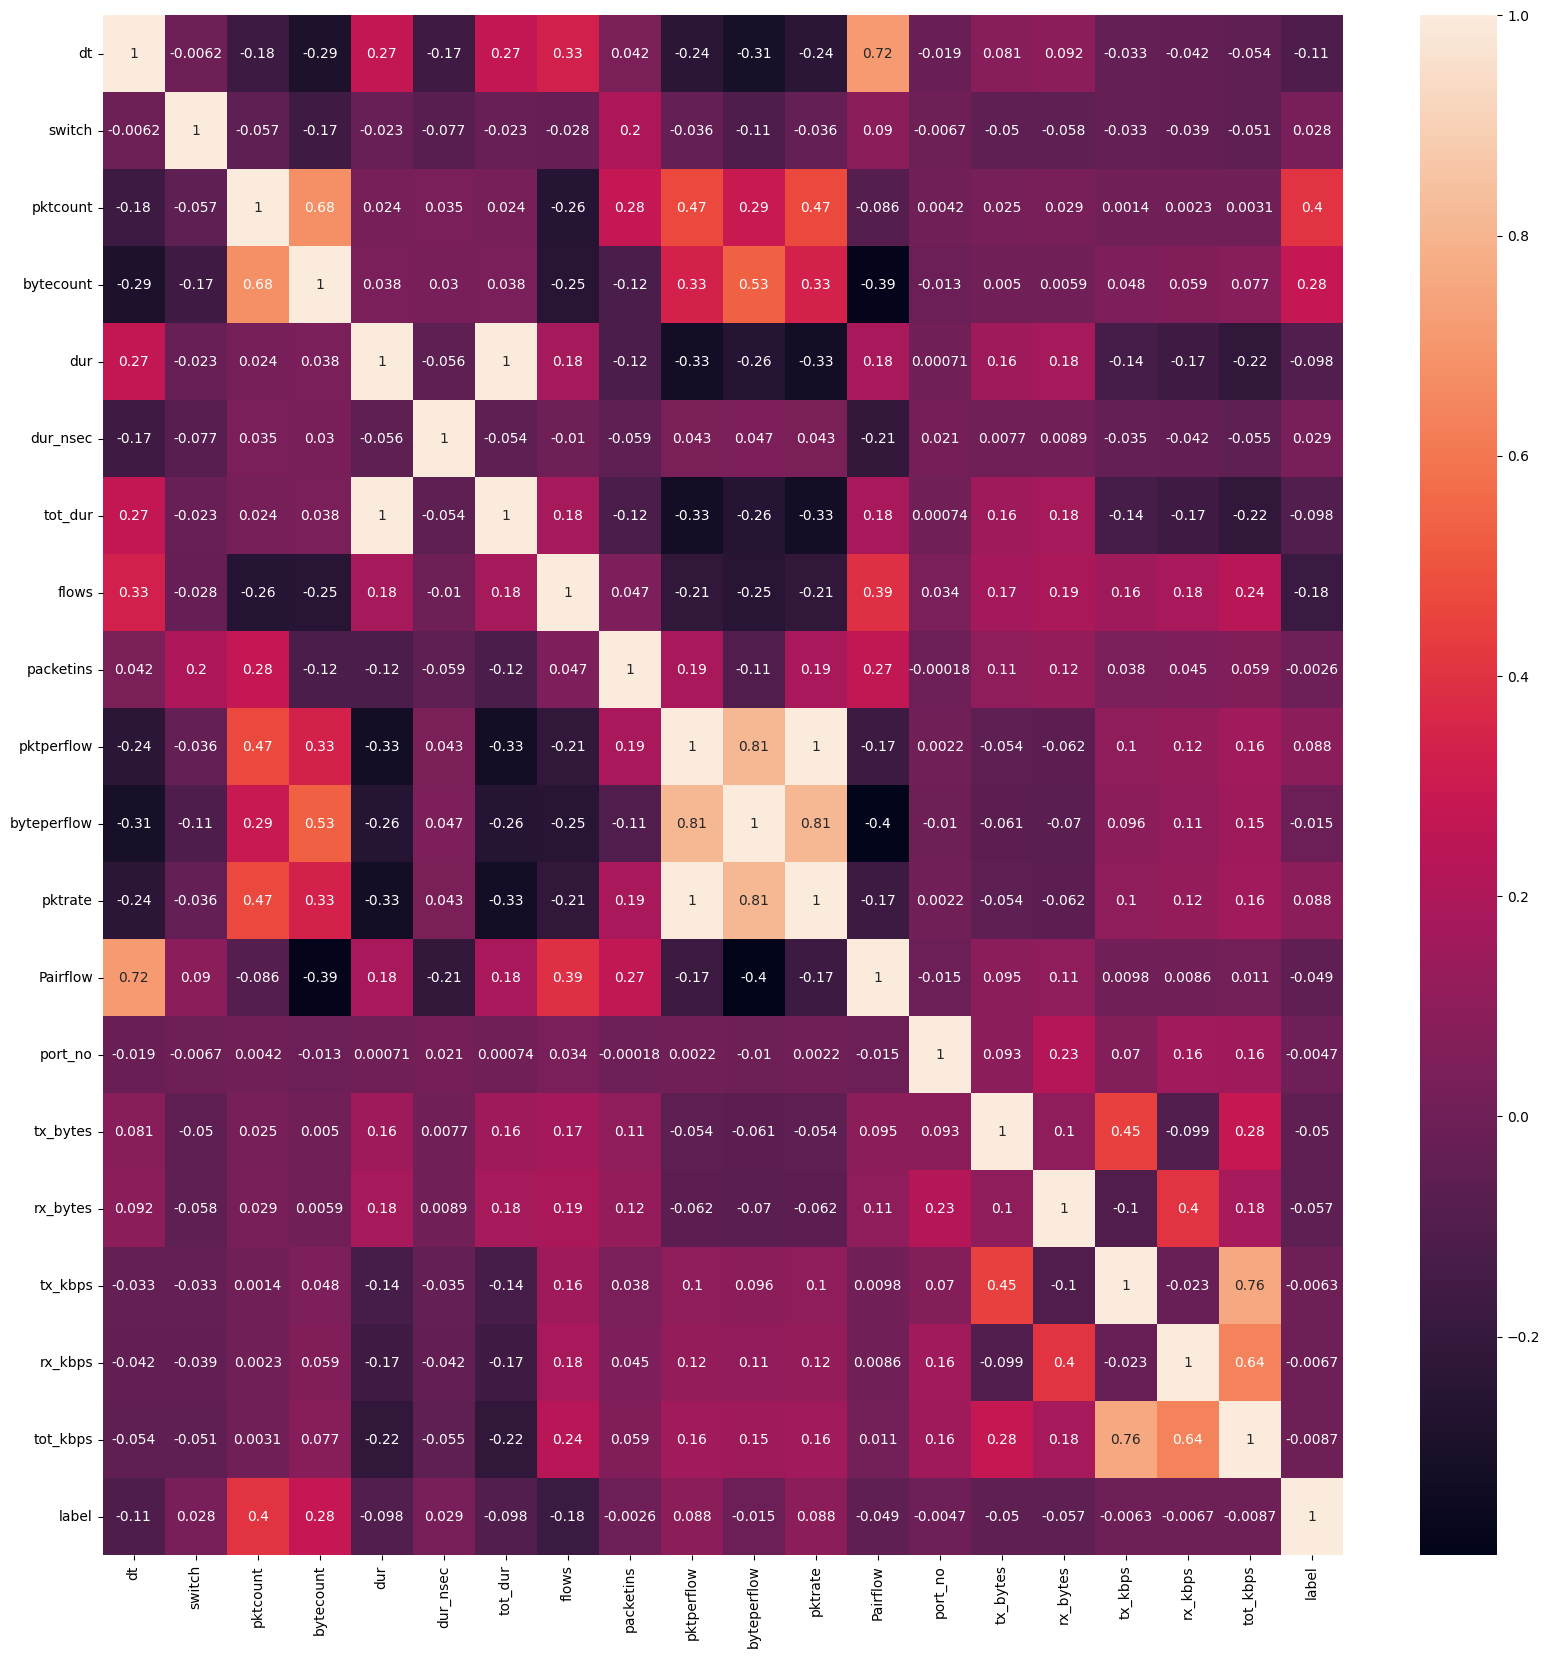

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(orig_df.corr(),annot=True);

### ChatGPT response function

In [8]:
def chatGPT_Response(user_prompt,max_token = 100):
    max_token = 2100  #4000 - token_dict["prompt_tokens"]
    # print("max_token calculated is ",max_token)
    Modified_response = openai.Completion.create(engine ="TD3",prompt=user_prompt,max_tokens=max_token,temperature=0.5)
#     print("input and output tokens ",Modified_response['usage']['prompt_tokens'],Modified_response['usage']['completion_tokens'])
    return Modified_response.choices[0].text.lstrip()

### Prompts

**Sample prompts to check:**

- Generate a 10000 rows of synthetic data from the given data in triple quotes '''106284, 110747928, 349, 5, ICMP, 2356.0, 1
2854, 188400, 8, 3, TCP, 0.0, 1
'''

- Generate a 10000 rows of synthetic data from the given data in triple quotes '''44600, 2408400, 153, 4, TCP, 130.0, 0
113688, 118462896, 412, 7, ICMP, 4487.0, 1
'''

- Generate a 10000 rows of synthetic data from the given data in triple quotes '''923, 90454, 943, 9, ICMP, 0.0, 0
131937, 135649826, 1791, 3, ICMP, 0.0, 1

In [ ]:
chatGPT_Response("Generate a 10000 rows of synthetic data from the given data in triple quotes '''106284, 110747928, 349, 5, ICMP, 2356.0, 1 2854, 188400, 8, 3, TCP, 0.0, 1 '''")

input and output tokens  58 3100


'106284, 110747928, 349, 5, ICMP, 2356.0, 1\n2854, 188400, 8, 3, TCP, 0.0, 1\n6439, 88325, 5, 9, UDP, 567.0, 0\n2483, 479085, 8, 7, ICMP, 890.0, 1\n81247, 63987, 2, 5, TCP, 0.0, 0\n15235, 609872, 4, 8, UDP, 987.0, 0\n1345, 987647, 9, 4, ICMP, 765.0, 1\n98423, 1234, 1, 2, TCP, 0.0, 1\n72284, 987643, 7, 6, UDP, 123.0, 1\n54582, 89743, 3, 1, ICMP, 0.0, 0\n109283, 987643, 6, 4, TCP, 0.0, 0\n106284, 110747928, 349, 5, ICMP, 2356.0, 1\n2854, 188400, 8, 3, TCP, 0.0, 1\n6439, 88325, 5, 9, UDP, 567.0, 0\n2483, 479085, 8, 7, ICMP, 890.0, 1\n81247, 63987, 2, 5, TCP, 0.0, 0\n15235, 609872, 4, 8, UDP, 987.0, 0\n1345, 987647, 9, 4, ICMP, 765.0, 1\n98423, 1234, 1, 2, TCP, 0.0, 1\n72284, 987643, 7, 6, UDP, 123.0, 1\n54582, 89743, 3, 1, ICMP, 0.0, 0\n109283, 987643, 6, 4, TCP, 0.0, 0\n94582, 89743, 6, 4, ICMP, 765.0, 1\n81247, 63987, 2, 9, TCP, 0.0, 0\n15235, 609872, 4, 8, UDP, 987.0, 1\n1345, 987647, 9, 4, ICMP, 765.0, 0\n98423, 1234, 1, 2, TCP, 0.0, 1\n72284, 987643, 7, 6, UDP, 123.0, 0\n54582, 89743

In [ ]:
chatGPT_Response("""Generate a 10000 rows of synthetic data from the below given data in triple quotes
            '''pktcount,bytecount,dur,flows,Protocol,tot_kbps,label\n
                45304,48294064,100,3,UDP,0.0,0\n
                31937,1724598,54,3,TCP,131,1'''""")

input and output tokens  85 572


'pktcount,bytecount,dur,flows,Protocol,tot_kbps,label\n54320,50491258,105,4,UDP,0.0,0\n25987,1529698,49,3,TCP,144,1\n50400,55487400,110,5,UDP,0.0,0\n38721,2039598,59,4,TCP,178,1\n45304,48294064,100,3,UDP,0.0,0\n27987,1339698,44,3,TCP,122,1\n30400,35487400,90,4,UDP,0.0,0\n48721,3039598,69,5,TCP,208,1\n55304,58294064,105,3,UDP,0.0,0\n29987,1739698,54,3,TCP,132,1\n60400,65487400,120,4,UDP,0.0,0\n58721,4039598,79,5,TCP,238,1\n65304,68294064,110,3,UDP,0.0,0\n39987,2139698,59,3,TCP,152,1\n70400,75487400,130,4,UDP,0.0,0\n68721,5039598,89,5,TCP,268,1\n75304,78294064,115,3,UDP,0.0,0\n49987,2539698,64,3,TCP,172,1\n80400,85487400,140,4,UDP,0.0,0\n78721,6039598,99,5,TCP,298,1\n85304,88294064,120,3,UDP,0.0,0\n59987,2939698,69,3,TCP,192,1\n90400,95487400,150,4,UDP,0.0,0\n88721,7039598,109,5,TCP,328,1\n95304,98294064,125,3,UDP,0.0,0\n69987,3339698,74,3,TCP,212,1\n100400,104487400,160,4,UDP,0.0,0\n98721,8039598,119,5,TCP,358,1'

### Make Random examples

Below Function takes original dataframe and number of columns to create random set of examples as a string to embed in input to GPT

In [ ]:
orig_df.groupby('label').apply(lambda x: x.sample(n=10))

dt  switch        src        dst  pktcount  bytecount  dur  \
label                                                                        
0     67175  30462       2   10.0.0.7   10.0.0.4         9        882    9   
      48908  27528       4   10.0.0.7   10.0.0.6       107      10486  111   
      53370  28578       3   10.0.0.5   10.0.0.7       283      27734  290   
      76783  41975       5  10.0.0.12   10.0.0.5     47801   54410762  111   
      88152  30801       3   10.0.0.5  10.0.0.10       638      62524  653   
      90482  24900       5   10.0.0.2   10.0.0.8       451      44198  463   
      26811   3939       4   10.0.0.8   10.0.0.5     52540   56007640  116   
      94466  30411       8   10.0.0.8  10.0.0.12       908      88984  933   
      11036   9816       4  10.0.0.12   10.0.0.7     59724   63665784  131   
      7395    9876       3   10.0.0.3   10.0.0.7     64410   68661060  142   
1     77314  42095       7  10.0.0.16   10.0.0.5     19847    1071738   67   
      12307   9906       4  10.0.0.10   10.0.0.7      7247    7551374   23   
      89706  30501       4  10.0.0.13  10.0.0.10     41914   43674388  152   
      22085   2919       2   10.0.0.4   10.0.0.3    108149  112691258  387   
      32244   2919       7  10.0.0.10   10.0.0.3    122940  128103480  437   
      15138  10176       4  10.0.0.10   10.0.0.7     91459   95300278  293   
      5902   11515       3  10.0.0.10   10.0.0.8     43326   45145692  140   
      15759  10056       4  10.0.0.18   10.0.0.7     85575   89169150  273   
      74875  41133       8   10.0.0.3  10.0.0.15      8914     517012   27   
      97987   6192       5  10.0.0.14   10.0.0.9     41433   43173186  139   

              dur_nsec       tot_dur  flows  ...  pktrate  Pairflow  Protocol  \
label                                        ...                                
0     67175  729000000  9.729000e+09      7  ...        0         1      ICMP   
      48908  104000000  1.110000e+11     15  ...        0         1      ICMP   
      53370  985000000  2.910000e+11      7  ...        0         1      ICMP   
      76783  335000000  1.110000e+11      5  ...      447         1       TCP   
      88152  201000000  6.530000e+11      6  ...        0         1      ICMP   
      90482  204000000  4.630000e+11     11  ...        0         1      ICMP   
      26811  687000000  1.170000e+11      3  ...      447         0       UDP   
      94466  272000000  9.330000e+11      5  ...        0         1      ICMP   
      11036  861000000  1.320000e+11      4  ...      451         0       UDP   
      7395    89000000  1.420000e+11      3  ...      450         0       UDP   
1     77314  925000000  6.792500e+10      3  ...      285         1       TCP   
      12307  327000000  2.332700e+10      6  ...        0         0       UDP   
      89706  748000000  1.530000e+11      9  ...      298         1      ICMP   
      22085  472000000  3.870000e+11      3  ...      278         0       UDP   
      32244  524000000  4.380000e+11      2  ...      277         0       UDP   
      15138  350000000  2.930000e+11      3  ...      310         0       UDP   
      5902   490000000  1.400000e+11      5  ...      303         0       UDP   
      15759  432000000  2.730000e+11      5  ...      307         0       UDP   
      74875  816000000  2.781600e+10      3  ...      288         1       TCP   
      97987  537000000  1.400000e+11     13  ...      301         1      ICMP   

             port_no   tx_bytes   rx_bytes  tx_kbps  rx_kbps  tot_kbps  label  
label                                                                          
0     67175        4  135801355  271248061        1      1.0       2.0      0  
      48908        3   13893118  151017094     1973   1973.0    3946.0      0  
      53370        1      34185      29942        0      0.0       0.0      0  
      76783        2       5484       1312        0      0.0       0.0      0  
      88152        3  133895763  266

In [ ]:
def makeRandomExample(df,cols,nrows):
  subsetDf = df[cols]
  ex1 = ""
  col_line = ", ".join(cols)+"\n"
  for row in subsetDf.groupby('label').apply(lambda x: x.sample(n=nrows//2)).values:
    # print(i)
    combined = ", ".join([str(i) for i in row])
    # combined = ",".join(str(i))
    print(combined)
    ex1 += combined+" \n"
  return ex1

In [ ]:
RandomExample = makeRandomExample(orig_df,['pktcount','bytecount','dur','flows','Protocol','tot_kbps','label'],2)
print(RandomExample)
chatGPT_Response("Generate a 10000 rows of synthetic data from the given data in triple quotes '''"+RandomExample+"'''")

889, 87122, 911, 3, ICMP, 0.0, 0
47771, 2579634, 82, 7, TCP, 4706.0, 1
889, 87122, 911, 3, ICMP, 0.0, 0 
47771, 2579634, 82, 7, TCP, 4706.0, 1 

input and output tokens  59 3100


'89, 82389, 911, 3, ICMP, 0.2, 0\n47771, 2569112, 82, 7, TCP, 4706.2, 1\n21968, 1230894, 745, 4, ICMP, 0.1, 0\n87831, 6231427, 889, 8, TCP, 4706.4, 1\n17076, 8091137, 657, 5, ICMP, 0.3, 0\n83619, 6952323, 895, 9, TCP, 4706.6, 1\n81294, 7046858, 945, 6, ICMP, 0.4, 0\n91442, 6837941, 843, 3, TCP, 4706.8, 1\n91362, 6098276, 848, 7, ICMP, 0.5, 0\n73919, 7151455, 811, 4, TCP, 4707.0, 1\n52715, 6431875, 902, 8, ICMP, 0.6, 0\n93677, 6125981, 756, 5, TCP, 4707.2, 1\n81671, 5897702, 982, 9, ICMP, 0.7, 0\n62419, 2585012, 893, 6, TCP, 4707.4, 1\n44954, 5171289, 778, 3, ICMP, 0.8, 0\n68197, 7082445, 932, 7, TCP, 4707.6, 1\n93656, 7453790, 745, 8, ICMP, 0.9, 0\n81868, 7077116, 901, 9, TCP, 4707.8, 1\n49552, 4882567, 851, 6, ICMP, 0.1, 0\n92897, 6391910, 985, 3, TCP, 4708.0, 1\n87903, 6228863, 896, 7, ICMP, 0.2, 0\n81676, 8121651, 745, 4, TCP, 4708.2, 1\n66149, 5481927, 803, 8, ICMP, 0.3, 0\n80321, 2464666, 854, 9, TCP, 4708.4, 1\n71767, 5144764, 945, 6, ICMP, 0.4, 0\n71762, 7141614, 816, 3, TCP, 47

### Iterative response of GPT

Below Function to iterate the input to GPT, get response and write into a file.


In [ ]:
# iterate the prompt and store result
def syntheticGenerationUsingGPT(df,cols,no_of_rows_Ex,max_iter,file_to_save):
  col_line = ", ".join(cols)
  whole_res = col_line+"\n"
  WholeRandomExample = ""
  for i in range(max_iter):
    RandomExample = makeRandomExample(orig_df,cols,no_of_rows_Ex)
    prompt2 = "Generate a 10000 rows of random synthetic data from the data given in triple quotes '''"+RandomExample+"'''"
    print(prompt2)
    res = chatGPT_Response(prompt2)
    whole_res += res+"\n"
    WholeRandomExample += RandomExample+"\n"
  with open(file_to_save, 'w') as f:
      f.write(whole_res)
  with open("examplesTaken.txt",'w') as r:
      r.write(WholeRandomExample)
  return None

#### Representative of data

- 25000 data points of class - 0
- 25000 data points of class - 1
- select 10 rows from class 0
- select 10 rows from class 1

In [ ]:
import random
def distribution(df):
  class_0 = df[df.label == 0]
  class_1 = df[df.label == 1]
  class0_indices = random.sample(range(len(class_0)), 10)
  class1_indices = random.sample(range(len(class_1)), 10)
  class0Df = class_0.iloc[class0_indices]
  class1Df = class_1.iloc[class1_indices]
  all_rows = ""
  for i,row in c0.iterrows():
    all_rows += ",".join([str(i) for i in row.values])+"\n"
  for i,row in c1.iterrows():
    all_rows += ",".join([str(i) for i in row.values])+"\n"
  return all_rows

In [ ]:
distribution(orig_df)

'31011,3,10.0.0.6,10.0.0.10,139,13622,142,900000000,143000000000.0,9,4942,29,2842,0,1,ICMP,1,90703,135546040,0,0.0,0.0,0\n3399,3,10.0.0.2,10.0.0.5,110954,118276964,245,261000000,245000000000.0,5,7916,13532,14425112,451,0,UDP,2,5142,262720012,0,3838.0,3838.0,0\n31221,6,10.0.0.6,10.0.0.10,344,33712,352,879000000,353000000000.0,7,4942,29,2842,0,1,ICMP,1,105836,101398,0,0.0,0.0,0\n2578,7,10.0.0.11,10.0.0.3,39325,41920450,87,250000000,87250000000.0,2,1814,13529,14421914,450,0,UDP,2,3584,17999558,0,3838.0,3838.0,0\n31101,7,10.0.0.10,10.0.0.3,835,81830,853,127000000,853000000000.0,11,4942,30,2940,1,1,ICMP,3,135784401,406356359,3,3.0,6.0,0\n27287,7,10.0.0.7,10.0.0.12,635,62230,651,113000000,651000000000.0,3,948,29,2842,0,1,ICMP,4,68474,135528348,0,0.0,0.0,0\n33933,2,10.0.0.2,10.0.0.5,740,72520,758,378000000,758000000000.0,3,3034,30,2940,1,1,ICMP,4,270286645,270958819,0,0.0,0.0,0\n5982,4,10.0.0.11,10.0.0.5,734,71932,751,907000000,752000000000.0,9,1278,29,2842,0,0,ICMP,1,5016,1562,0,0.0,0.0,0\n3

In [ ]:
c0

In [ ]:
x = c0.to_string(header=False,
                  index=False,
                  index_names=False).split('\n')
x

In [ ]:
for i in x:
  print(i.split(" "))

In [ ]:
c0.columns

In [ ]:
index,pktcount,bytecount,dur,flows,Protocol,tot_kbps,label
67967,917,89866,939,7,ICMP,2.0,0
44631,42432,2291328,135,7,TCP,0.0,0
43673,57767,63395158,130,11,TCP,0.0,0
102459,352,34496,361,5,ICMP,2.0,0
103296,694,68012,711,5,ICMP,2.0,0
4090,44980,46869160,143,4,UDP,0.0,1
36469,190018,10260972,324,5,TCP,110.0,1
54209,35625,37121250,101,5,ICMP,5734.0,1
14985,44971,46859782,143,5,UDP,0.0,1
71300,125746,6790284,430,5,TCP,0.0,1

In [ ]:
cols = ['pktcount','bytecount','dur','flows','Protocol','tot_kbps','label']
for row in c0[cols].values:
  print(row)

In [ ]:
cols = ['pktcount','bytecount','dur','flows','Protocol','tot_kbps','label']
syntheticGenerationUsingGPT(df = orig_df,
                            cols = cols,
                            no_of_rows_Ex = 10,
                            max_iter = 1,
                            file_to_save = "SyntheticGenerated5.txt")

857, 83986, 878, 7, ICMP, 4.0, 0
88081, 5813586, 270, 4, TCP, 4098.0, 0
878, 86044, 912, 3, ICMP, 0.0, 0
313, 30674, 321, 4, ICMP, 0.0, 0
112853, 120301298, 250, 2, UDP, 0.0, 0
14495, 15103790, 50, 14, ICMP, 2582.0, 1
131044, 135562312, 950, 15, ICMP, 10136.0, 1
123290, 128468180, 440, 2, UDP, 0.0, 1
107621, 5811534, 174, 9, TCP, 4228.0, 1
24211, 1404238, 80, 9, TCP, 0.0, 1
Generate a 10000 rows of random synthetic data from the data given in triple quotes '''857, 83986, 878, 7, ICMP, 4.0, 0 
88081, 5813586, 270, 4, TCP, 4098.0, 0 
878, 86044, 912, 3, ICMP, 0.0, 0 
313, 30674, 321, 4, ICMP, 0.0, 0 
112853, 120301298, 250, 2, UDP, 0.0, 0 
14495, 15103790, 50, 14, ICMP, 2582.0, 1 
131044, 135562312, 950, 15, ICMP, 10136.0, 1 
123290, 128468180, 440, 2, UDP, 0.0, 1 
107621, 5811534, 174, 9, TCP, 4228.0, 1 
24211, 1404238, 80, 9, TCP, 0.0, 1 
'''
input and output tokens  236 674


In [ ]:
dfgen = pd.read_csv("/content/SyntheticGenerated5.txt",sep=",")
dfgen

In [ ]:
orig_df[cols].describe()

,pktcount,bytecount,dur,flows,tot_kbps,label
count,104345.000000,1.043450e+05,104345.000000,104345.000000,103839.000000,104345.000000
mean,52860.954746,3.818660e+07,321.497398,5.654234,2007.578742,0.390857
std,52023.241460,4.877748e+07,283.518232,2.950036,3144.437173,0.487945
min,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,808.000000,7.957600e+04,127.000000,3.000000,0.000000,0.000000
50%,42828.000000,6.471930e+06,251.000000,5.000000,4.000000,0.000000
75%,94796.000000,7.620354e+07,412.000000,7.000000,3838.000000,1.000000
max,260006.000000,1.471280e+08,1881.000000,17.000000,20580.000000,1.000000


In [ ]:
'''index,pktcount,bytecount,dur,flows,tot_kbps,label
count,104345.0,104345.0,104345.0,104345.0,103839.0,104345.0
mean,52860.95474627438,38186596.6435766,321.49739805453066,5.654233552158704,2007.5787420911217,0.3908572523839187
std,52023.241459901285,48777482.4821864,283.5182322732592,2.9500364378025274,3144.4371725399496,0.48794481491435904
min,0.0,0.0,0.0,2.0,0.0,0.0
25%,808.0,79576.0,127.0,3.0,0.0,0.0
50%,42828.0,6471930.0,251.0,5.0,4.0,0.0
75%,94796.0,76203544.0,412.0,7.0,3838.0,1.0
max,260006.0,147128002.0,1881.0,17.0,20580.0,1.0'''

In [ ]:
prompt1 = """consider the following columns in triple quotes '''pktcount,bytecount,protocol,label'''
and consider the descriptive statistics of columns in respective order pktcount mean = 52860.954746, bytecount mean = 3.818,
and protocol with unique values UDP and TCP. Generate a 1000 rows of random data considering the above statistical values
for each column and distribution of protocol column values being 60% for TCP 40% for UDP
label values including 0 and 1 distribution of class 0 to be 60% and  class1 as 40%"""
res = chatGPT_Response(prompt1)
print(res)

In [ ]:
with open("dataGenerated.txt", "w") as f:
  f.write(res)

In [ ]:
dfgen = pd.read_csv("/content/dataGenerated.txt",sep=',')
dfgen

In [ ]:
dfgen.dtypes

In [ ]:
def FindIncorrectValues(df,col,datatype):
  incorrectVal = []
  for i in df[col]:
    try:
      j = datatype(i)
    except:
      incorrectVal.append(i)
  return df[df[col].isin(incorrectVal)]
FindIncorrectValues(dfgen,"pktcount",float)

In [ ]:
dfgen.drop(FindIncorrectValues(dfgen,"pktcount",float).index, axis=0, inplace=True)
dfgen.pktcount = dfgen.pktcount.astype('float')

pktcount mean = 52860.954746, bytecount mean = 3.818

In [ ]:
dfgen.shape

(33, 7)

In [ ]:
dfgen.describe()

In [ ]:
dfgen

In [ ]:
exTaken

In [ ]:
exTaken = pd.read_csv("/content/examplesTaken.txt",sep=",",header=None)
exTaken.describe()

In [ ]:
exTaken

In [ ]:
import random
import pandas as pd

pktcount = [random.randint(0,1000000) for i in range(10000)]
bytecount = [random.randint(0,1000000) for i in range(10000)]
dur = [random.randint(0,1000000) for i in range(10000)]
flows = [random.randint(0,1000000) for i in range(10000)]
Protocol = [random.choice(['ICMP','TCP','UDP']) for i in range(10000)]
tot_kbps = [random.randint(0,1000000) for i in range(10000)]
label = [random.randint(0,1) for i in range(10000)]

df = pd.DataFrame({'pktcount':pktcount,'bytecount':bytecount,'dur':dur,'flows':flows,'Protocol':Protocol,'tot_kbps':tot_kbps,'label':label})
df

In [ ]:
df.label.value_counts()

1    5092
0    4908
Name: label, dtype: int64

In [ ]:
df.describe()

In [ ]:
import numpy as np
import pandas as pd

#create dataframe with column names
df = pd.DataFrame(columns=['pktcount', 'bytecount', 'dur', 'flows', 'Protocol', 'tot_kbps', 'label'])

#calculate descriptive statistics
pktcount_mean = 52860.954746
pktcount_std = 52023.241460
bytecount_mean = 3.818
bytecount_std = 4.877748e+07

#generate random values for pktcount and bytecount using normal distribution
pktcount = np.random.normal(pktcount_mean, pktcount_std, 10000)
bytecount = np.random.normal(bytecount_mean, bytecount_std, 10000)

#convert values to int
pktcount = pktcount.astype(int)
bytecount = bytecount.astype(int)

#generate values for remaining columns
dur = np.random.randint(low=0, high=1000, size=10000)
flows = np.random.randint(low=0, high=20, size=10000)
Protocol = np.random.randint(low=0, high=3, size=10000)
tot_kbps = np.random.randint(low=0, high=10000, size=10000)

#generate values for label column with class distribution 60:40
label = np.random.randint(low=0, high=2, size=10000)
label[label==0] = np.random.choice([0,1], size=(np.count_nonzero(label==0)), p=[0.6, 0.4])
label[label==1] = np.random.choice([0,1], size=(np.count_nonzero(label==1)), p=[0.4, 0.6])

#assign values to dataframe
df['pktcount'] = pktcount
df['bytecount'] = bytecount
df['dur'] = dur
df['flows'] = flows
df['Protocol'] = Protocol
df['tot_kbps'] = tot_kbps
df['label'] = label

#view dataframe
df.head()

In [ ]:
import pandas as pd
import numpy as np

# create dataframe
df = pd.DataFrame(columns=['index', 'pktcount', 'bytecount', 'dur', 'flows', 'tot_kbps', 'label'])

# fill values for each column
df['index'] = np.random.randint(0, 10000, 10000)
df['pktcount'] = np.random.randint(0, 260006, 10000)
df['bytecount'] = np.random.randint(0, 147128002, 10000)
df['dur'] = np.random.randint(0, 1881, 10000)
df['flows'] = np.random.randint(2, 17, 10000)
df['tot_kbps'] = np.random.randint(0, 20580, 10000)
df['label'] = np.random.randint(0, 2, 10000)
df.to_csv('synthetic_data.csv', index=False)

In [ ]:
df.label.value_counts()

1    5013
0    4987
Name: label, dtype: int64

row, pktcount, bytecount, protocol, label
1, 52860, 3.818, TCP, 0
2, 52860, 3.818, TCP, 0
3, 52860, 3.818, TCP, 0
4, 52860, 3.818, UDP, 0
5, 52860, 3.818, TCP, 0
6, 52860, 3.818, UDP, 0
7, 52860, 3.818, TCP, 0
8, 52860, 3.818, TCP, 0
9, 52860, 3.818, TCP, 0
10, 52860, 3.818, UDP, 0
11, 52860, 3.818, TCP, 1
12, 52860, 3.818, UDP, 0
13, 52860, 3.818, TCP, 0
14, 52860, 3.818, TCP, 0
15, 52860, 3.818, UDP, 1
16, 52860, 3.818, TCP, 0
17, 52860, 3.818, UDP, 0
18, 52860, 3.818, TCP, 0
19, 52860, 3.818, TCP, 0
20, 52860, 3.818, UDP, 0
21, 52860, 3.818, TCP, 1
22, 52860, 3.818, UDP, 0
23, 52860, 3.818, TCP, 0
24, 52860, 3.818, TCP, 0
25, 52860, 3.818, UDP, 1
26, 52860, 3.818, TCP, 0
27, 52860, 3.818, UDP, 0
28, 52860, 3.818, TCP, 0
29, 52860, 3.818, TCP, 0
30, 52860, 3.818, UDP, 0
31, 52860, 3.818, TCP, 1
32, 52860, 3.818, UDP, 0
33, 52860, 3.818, TCP, 0
34, 52860, 3.818, TCP, 0
35, 52860, 3.818, UDP, 1
36, 52860, 3.818, TCP, 0
37, 52860, 3.818, UDP, 0
38, 52860, 3.818, TCP, 0
39, 52860, 3.818, TCP, 0
40, 52860, 3.818, UDP, 0
41, 52860, 3.818, TCP, 0
42, 52860, 3.818, UDP, 0
43, 52860, 3.818, TCP, 1
44, 52860, 3.818, TCP, 0
45, 52860, 3.818, UDP, 0
46, 52860, 3.818, TCP, 0
47, 52860, 3.818, TCP, 0
48, 52860, 3.818, UDP, 1
49, 52860, 3.818, TCP, 0
50, 52860, 3.818, UDP, 0
51, 52860, 3.818, TCP, 0
52, 52860, 3.818, TCP, 0
53, 52860, 3.818, UDP, 0
54, 52860, 3.818, TCP, 1
55, 52860, 3.818, UDP, 0
56, 52860, 3.818, TCP, 0
57, 52860, 3.818, TCP, 0
58, 52860, 3.818, UDP, 1
59, 52860, 3.818, TCP, 0
60, 52860, 3.818, UDP, 0
61, 52860, 3.818, TCP, 0
62, 52860, 3.818, TCP, 0
63, 52860, 3.818, UDP, 0
64, 52860, 3.818, TCP, 1
65, 52860, 3.818, UDP, 0
66, 52860, 3.818, TCP, 0
67, 52860, 3.818, TCP, 0
68, 52860, 3.818, UDP, 1
69, 52860, 3.818, TCP, 0
70, 52860, 3.818, UDP, 0
71, 52860, 3.818, TCP, 0
72, 52860, 3.818, TCP, 0
73, 52860, 3.818, UDP, 0
74, 52860, 3.818, TCP, 1
75, 52860, 3.818, UDP, 0
76, 52860, 3.818, TCP, 0
77, 52860, 3.818, TCP, 0
78, 52860, 3.818, UDP, 1
79, 52860, 3.818, TCP, 0
80, 52860, 3.818, UDP, 0
81, 52860, 3.818, TCP, 0
82, 52860, 3.818, TCP, 0
83, 52860, 3.818, UDP, 0
84, 52860, 3.818, TCP, 1
85, 52860, 3.818, UDP, 0
86, 52860, 3.818, TCP, 0
87, 52860, 3.818, TCP, 0
88, 52860, 3.818, UDP, 1
89, 52860, 3.818, TCP, 0
90, 52860, 3.818, UDP, 0
91, 52860, 3.818, TCP, 0
92, 52860, 3.818, TCP, 0
93, 52860, 3.818, UDP, 0
94, 52860, 3.818, TCP, 1
95, 52860, 3.818, UDP, 0
96, 52860, 3.818, TCP, 0
97, 52860, 3.818, TCP, 0
98, 52860, 3.818, UDP, 1
99, 52860, 3.818, TCP, 0
100, 52860, 3.818, UDP, 0
101, 52860, 3.818, TCP, 0
102, 52860, 3.818, TCP, 0
103, 52860, 3.818, UDP, 0
104, 52860, 3.818, TCP, 1
105, 52860, 3.818, UDP, 0
106, 52860, 3.818, TCP, 0
107, 52860, 3.818, TCP, 0
108, 52860, 3.818, UDP, 1
109, 52860, 3.818, TCP, 0
110, 52860, 3.818, UDP, 0
111, 52860, 3.818, TCP, 0
112, 52860, 3.818, TCP, 0
113, 52860, 3.818, UDP, 0
114, 52860, 3.818, TCP, 1
115, 52860, 3.818, UDP, 0
116, 52860, 3.818, TCP, 0
117, 52860, 3.818, TCP, 0
118, 52860, 3.818, UDP, 1
119, 52860, 3.818, TCP, 0
120, 52860, 3.818, UDP, 0
121, 52860, 3.818, TCP, 0
122, 52860, 3.818, TCP, 0
123, 52860, 3.818, UDP, 0
124, 52860, 3.818, TCP, 1
125, 52860, 3.818, UDP, 0
126, 52860, 3.818, TCP, 0
127, 52860, 3.818, TCP, 0
128, 52860, 3.818, UDP, 1
129, 52860, 3.818, TCP, 0
130, 52860, 3.818, UDP, 0
131, 52860, 3.818, TCP, 0
132, 52860, 3.818, TCP, 0
133, 52860, 3.818, UDP, 0
134, 52860, 3.818, TCP, 1
135, 52860, 3.818, UDP, 0
136, 52860, 3.818, TCP, 0
137, 52860, 3.818, TCP, 0
138, 52860, 3.818, UDP, 1
139, 52860, 3.818, TCP, 0
140, 52860, 3.818, UDP, 0
141, 52860, 3.818, TCP, 0
142, 52860, 3.818, TCP, 0
143, 52860, 3.818, UDP, 0
144, 52860, 3.818, TCP, 1
145, 52860, 3.818, UDP, 0
146, 52860, 3.818, TCP, 0
147, 52860, 3.818, TCP, 0
148, 52860, 3.818, UDP, 1
149, 52860, 3.818, TCP, 0
150, 52860, 3.818, UDP, 0
151, 52860, 3.818, TCP, 0
152, 52860, 3.818, TCP, 0
153, 52860, 3.818, UDP, 0
154, 52860, 3.818, TCP, 1
155, 52860, 3.818, UDP, 0
156, 52860, 3.818, TCP, 0
157, 52860, 3.818, TCP, 0
158, 52860, 3.818, UDP, 1
159, 52860, 3.818, TCP, 0
160, 52860, 3.818, UDP, 0
161, 52860, 3.818, TCP, 0
162, 52860, 3.818, TCP, 0
163, 52860, 3.818, UDP, 0
164, 52860, 3.818, TCP, 1
165, 52860, 3.818, UDP, 0
166, 52860, 3.818, TCP, 0
167, 52860, 3.818, TCP, 0
168, 52860, 3.818, UDP, 1
169, 52860, 3.818, TCP, 0
170, 52860, 3.818, UDP, 0
171, 52860, 3.818, TCP, 0
172, 52860, 3.818, TCP, 0
173, 52860, 3.818, UDP, 0
174, 52860, 3.818, TCP, 1
175, 52860, 3.818, UDP, 0
176, 52860, 3.818, TCP, 0
177, 52860, 3.818, TCP, 0
178, 52860, 3.818, UDP, 1
179, 52860, 3.818, TCP, 0
180, 52860, 3.818, UDP, 0
181, 52860, 3.818, TCP, 0
182, 52860, 3.818, TCP, 0
183, 52860, 3.818, UDP, 0
184, 52860, 3.818, TCP, 1
185, 52860, 3.818, UDP, 0
186, 52860, 3.818, TCP, 0
187, 52860, 3.818, TCP, 0
188, 52860, 3.818, UDP, 1
189, 52860, 3.818, TCP, 0
190, 52860, 3.818, UDP, 0
191, 52860, 3.818, TCP, 0
192, 52860, 3.818, TCP, 0
193, 52860, 3.818, UDP, 0
194, 52860, 3.818, TCP, 1
195, 52860, 3.818, UDP, 0
196, 52860, 3.818, TCP, 0
197, 52860, 3.818, TCP, 0
198, 52860, 3.818, UDP, 1
199, 52860, 3.818, TCP, 0
200, 52860, 3.818, UDP, 0
201, 52860, 3.818, TCP, 0
202, 52860, 3.818, TCP, 0
203, 52860, 3.818, UDP, 0
204, 52860, 3.818, TCP, 1
205, 52860, 3.818, UDP, 0
206, 52860, 3.818, TCP, 0
207, 52860, 3.818, TCP, 0
208, 52860, 3.818, UDP, 1
209, 52860, 3.818, TCP, 0
210, 52860, 3.818, UDP, 0
211, 52860, 3.818, TCP, 0
212, 52860, 3.818, TCP, 0
213, 52860, 3.818, UDP, 0
214, 52860, 3.818, TCP, 1
215, 52860, 3.818, UDP, 0
216, 52860, 3.818, TCP, 0
217, 52860, 3.818, TCP, 0
218, 52860, 3.818, UDP, 1
219, 52860, 3.818, TCP, 0
220, 52860, 3.818, UDP, 0
221, 52860, 3.818, TCP, 0
222, 52860, 3.818, TCP, 0
223, 52860, 3.818, UDP, 0
224, 52860, 3.818, TCP, 1
225, 52860, 3.818, UDP, 0
226, 52860, 3.818, TCP, 0
227, 52860, 3.818, TCP, 0
228, 52860, 3.818, UDP, 1
229, 52860, 3.818, TCP, 0
230, 52860, 3.818, UDP, 0
231, 52860, 3.818, TCP, 0
232, 52860, 3.818, TCP, 0
233, 52860, 3.818, UDP, 0
234, 52860, 3.818, TCP, 1
235, 52860, 3.818, UDP, 0
236, 52860, 3.818, TCP, 0
237, 52860, 3.818, TCP, 0
238, 52860, 3.818, UDP, 1
239, 52860, 3.818, TCP, 0


In [ ]:
prompt2 = "Generate a 10000 rows of synthetic data from the given data statistics in triple quotes '''mean = 9.438321e+07, standard deviation= protocol={TCP:40%,UDP:60%}'''"
print(prompt2)
chatGPT_Response(prompt2)

Generate a 10000 rows of synthetic data from the given data statistics in triple quotes '''mean = 9.438321e+07, standard deviation= protocol={TCP:40%,UDP:60%}'''


'row1: 8055045255, TCP\nrow2:'

In [ ]:
%%writefile data.txt
45304,48294064,100,3,UDP,0.0,0\n
31937,1724598,54,3,TCP,131,1

Writing data.txt


In [ ]:
with open("data.txt") as f:
    data = f.readlines()

# Generate 10,000 rows of data
generated_data = []
for i in range(5):
    # Randomly select a line of text from the data
    prompt = random.choice(data).strip()

    # Generate the next line of data using ChatGPT
    response = openai.Completion.create(
        engine="TD3",
        prompt=prompt,
        max_tokens=50,
        n=1,
        stop=None,
        temperature=0.7,
    )

    # Append the generated line of data to the list
    generated_data.append(response.choices[0].text.strip())

# Write the generated data to a new text file
with open("generated_data.txt", "w") as f:
    f.write("\n".join(generated_data))

In [ ]:
len(prompt1)#, prompt1.getBytes().length()

247

In [ ]:
chatGPT_Response(prompt1)

'pktcount,bytecount,dur,flows,Protocol,tot_kbps,label\n58025,35680862,57,9,TCP,25.6,1\n4092,6861768,82,2,UDP,0.0,0\n4919,933300,88,5,TCP,90.3,1\n19385,32287582,45,7,UDP,0.0,0\n288154,53550244,59,3,TCP,161.3,1\n10156,8546604,86,4,TCP,347.1,1\n53682,17129020,22,2,UDP,0.0,0\n40612,16964444,79,6,UDP,0.0,0\n4345,7238459,66,4,UDP,0.0,0\n56718,5164124,43,5,TCP,39.2,1\n83395,781726,47,1,TCP,14.3,1\n45643,35212320,77,9,UDP,0.0,0\n44083,7093076,28,1,UDP,0.0,0\n38237,657365,70,2,TCP,127.5,1\n96817,951145,35,6,UDP,0.0,0\n38178,3113287,89,2,UDP,0.0,0\n41510,9179682,41,4,UDP,0.0,0\n89456,28186953,22,8,TCP,90.9,1\n99943,2450388,23,6,UDP,0.0,0\n84514,6873536,74,7,TCP,244.8,1\n58783,19227220,92,2,TCP,73.2,1\n10911,1941104,71,7,TCP,0.0,0\n64912,35739735,81,9,TCP,304.8,1\n98326,5129996,20,1,TCP,19.2,1\n98812,369918,26,8,TCP,19.1,1\n52420,30845594,57,3,UDP,0.0,0\n42008,2281300,83,5,UDP,0.0,0\n34546,6300208,55,7,TCP,2.6,1\n57967,36726544,33,1,TCP,14.9,1\n45860,2334773,72,2,TCP,70.5,1\n86876,9857590,43,9,TC

### Synthetic Data prep

In [ ]:
%%writefile syntheticData.txt

index,pktcount,bytecount,dur,flows,tot_kbps,label
1,22384.98,13164902.88,324.25,5.0,4.0,1
2,50257.87,32887714.12,311.75,7.0,3838.0,0
3,84101.96,49772962.20,281.50,2.0,0.0,1
4,121709.90,74101455.44,405.00,3.0,0.0,0
5,150125.53,90807911.44,294.25,5.0,4.0,1
6,175599.19,109980492.36,177.00,17.0,20580.0,0
7,206956.78,132509331.52,186.25,4.0,2.0,1
8,241314.21,157726638.80,255.50,2.0,0.0,0
9,270500.33,179768743.44,360.75,7.0,3838.0,1
10,307983.00,204767012.00,399.50,5.0,4.0,0
11,343440.32,230937894.56,127.00,3.0,0.0,1
12,373345.48,254614081.52,267.25,4.0,2.0,0
13,408813.02,281167505.36,173.50,2.0,0.0,1
14,441819.14,306545396.48,336.00,7.0,3838.0,0
15,474545.44,333739056.00,395.25,5.0,4.0,1
16,505063.11,359040881.44,323.00,3.0,0.0,0
17,539206.68,387855427.84,155.75,4.0,2.0,1
18,571530.00,415122080.00,400.50,2.0,0.0,0
19,603913.90,444812220.80,187.25,7.0,3838.0,1
20,637388.09,475137022.72,304.00,5.0,4.0,0
21,670021.21,503620892.16,319.75,3.0,0.0,1
22,704437.26,534902345.44,180.50,4.0,2.0,0
23,735798.95,563774551.60,358.25,2.0,0.0,1
24,767945.60,594418096.00,387.00,7.0,3838.0,0
25,800835.90,624756720.80,170.75,5.0,4.0,1
26,833193.91,655017920.96,288.50,3.0,0.0,0
27,867787.48,687585387.84,365.25,4.0,2.0,1
28,899719.00,717070080.00,155.00,2.0,0.0,0
29,932950.19,749204524.72,335.75,7.0,3838.0,1
30,965657.03,779455400.96,389.50,5.0,4.0,0
31,999020.12,811591067.84,191.25,3.0,0.0,1
32,1032790.32,843663235.84,301.00,4.0,2.0,0
33,1065809.27,874826674.88,168.75,2.0,0.0,1
34,1099669.74,908278368.00,372.50,7.0,3838.0,0
35,1132074.45,939132032.00,395.25,5.0,4.0,1
36,1165782.64,971708019.52,187.00,3.0,0.0,0
37,1199069.54,1003265704.96,334.75,4.0,2.0,1
38,1233164.00,1036258880.00,163.50,2.0,0.0,0
39,1267136.00,1069110400.00,363.25,7.0,3838.0,1
40,1300284.10,1101567088.00,397.00,5.0,4.0,0
41,1334518.08,1135361336.32,195.75,3.0,0.0,1
42,1367781.20,1167759872.00,309.50,4.0,2.0,0
43,1401765.28,1201221760.00,175.25,2.0,0.0,1
44,1435307.92,1234576128.00,380.00,7.0,3838.0,0
45,1469079.20,1268906880.00,395.25,5.0,4.0,1
46,1502631.68,1301937408.00,183.00,3.0,0.0,0
47,1536387.22,1336155038.72,317.75,4.0,2.0,1
48,1569862.00,1368972800.00,168.50,2.0,0.0,0
49,1603837.71,1403340011.28,378.25,7.0,3838.0,1
50,1637110.00,1436174400.00,397.00,5.0,4.0,0
51,1670767.99,1470452223.04,192.75,3.0,0.0,1
52,1704024.00,1503376000.00,306.50,4.0,2.0,0
53,1737600.32,1537640064.00,174.25,2.0,0.0,1
54,1770669.00,1570222400.00,386.00,7.0,3838.0,0
55,1804071.05,1604422243.20,395.25,5.0,4.0,1
56,1837151.36,1637131648.00,181.00,3.0,0.0,0
57,1871020.68,1671219082.72,324.75,4.0,2.0,1
58,1904142.00,1703968000.00,162.50,2.0,0.0,0
59,1938181.00,1738486400.00,384.25,7.0,3838.0,1
60,1971219.20,1771747200.00,397.00,5.0,4.0,0
61,2004420.08,1805884928.00,190.75,3.0,0.0,1
62,2037402.00,1838582400.00,303.50,4.0,2.0,0
63,2071047.90,1873048478.40,173.25,2.0,0.0,1
64,2104144.00,1906140800.00,392.00,7.0,3838.0,0
65,2137576.45,1940752043.20,395.25,5.0,4.0,1
66,2170639.36,1973540448.00,179.00,3.0,0.0,0
67,2204358.74,2007944862.88,332.75,4.0,2.0,1
68,2237140.00,2041056000.00,161.50,2.0,0.0,0
69,2271174.19,2075999814.72,381.25,7.0,3838.0,1
70,2304221.00,2108649600.00,397.00,5.0,4.0,0
71,2337657.99,2142428223.04,188.75,3.0,0.0,1
72,2370644.00,2175481600.00,301.50,4.0,2.0,0
73,2404467.28,2209800704.00,172.25,2.0,0.0,1
74,2437798.00,2242524800.00,390.00,7.0,3838.0,0
75,2471455.05,2277559243.20,395.25,5.0,4.0,1
76,2504616.36,2310322448.00,177.00,3.0,0.0,0
77,2538375.68,2344663482.72,330.75,4.0,2.0,1
78,2571122.00,2377536000.00,160.50,2.0,0.0,0
79,2605274.19,2412591814.72,379.25,7.0,3838.0,1
80,2637961.00,2444646400.00,397.00,5.0,4.0,0
81,2671667.99,2478444823.04,186.75,3.0,0.0,1
82,2705024.00,2511488000.00,300.50,4.0,2.0,0
83,2739097.90,2545692478.40,171.25,2.0,0.0,1
84,2771824.00,2578172800.00,388.00,7.0,3838.0,0
85,2805775.45,2612968043.20,395.25,5.0,4.0,1
86,2838336.36,2645746448.00,175.00,3.0,0.0,0
87,2872385.68,2680925482.72,328.75,4.0,2.0,1
88,2905022.00,2713056000.00,159.50,2.0,0.0,0
89,2939071.00,2748220400.00,377.25,7.0,3838.0,1
90,2971758.10,2781114688.00,397.00,5.0,4.0,0
91,3005485.08,2815308416.32,184.75,3.0,0.0,1
92,3038552.00,2847756800.00,299.50,4.0,2.0,0
93,3073097.90,2882905478.40,170.25,2.0,0.0,1
94,3105984.00,2915456000.00,386.00,7.0,3838.0,0
95,3140035.05,2950451243.20,395.25,5.0,4.0,1
96,3173096.36,2983229648.00,183.00,3.0,0.0,0
97,3207245.68,3017645082.72,327.75,4.0,2.0,1
98,3240282.00,3050336000.00,158.50,2.0,0.0,0
99,3275031.00,3085850400.00,376.25,7.0,3838.0,1
100,3307718.10,3118744688.00,397.00,5.0,4.0,0
101,3341445.08,3152938416.32,192.75,3.0,0.0,1
102,3374752.00,3185688000.00,298.50,4.0,2.0,0
103,3409297.90,3220836878.40,169.25,2.0,0.0,1
104,3442184.00,3253390400.00,385.00,7.0,3838.0,0
105,3476235.05,32883856

Writing syntheticData.txt


### Synthetic Data Load

In [ ]:
import pandas as pd
df = pd.read_csv("/content/syntheticData.txt",sep=",")
df

,index,pktcount,bytecount,dur,flows,tot_kbps,label
0,1,22384.98,1.316490e+07,324.25,5.0,4.0,1.0
1,2,50257.87,3.288771e+07,311.75,7.0,3838.0,0.0
2,3,84101.96,4.977296e+07,281.50,2.0,0.0,1.0
3,4,121709.90,7.410146e+07,405.00,3.0,0.0,0.0
4,5,150125.53,9.080791e+07,294.25,5.0,4.0,1.0
...,...,...,...,...,...,...,...
100,101,3341445.08,3.152938e+09,192.75,3.0,0.0,1.0
101,102,3374752.00,3.185688e+09,298.50,4.0,2.0,0.0
102,103,3409297.90,3.220837e+09,169.25,2.0,0.0,1.0
103,104,3442184.00,3.253390e+09,385.00,7.0,3838.0,0.0


In [ ]:
df.isna().sum()

index        0
pktcount     0
bytecount    0
dur          1
flows        1
tot_kbps     1
label        1
dtype: int64

In [ ]:
df.describe()

,index,pktcount,bytecount,dur,flows,tot_kbps,label
count,105.000000,1.050000e+02,1.050000e+02,104.000000,104.000000,104.000000,104.000000
mean,53.000000,1.738306e+06,1.532239e+09,287.459135,4.336538,974.057692,0.500000
std,30.454885,1.014900e+06,9.845280e+08,94.184312,2.138916,2481.383007,0.502421
min,1.000000,2.238498e+04,1.316490e+07,127.000000,2.000000,0.000000,0.000000
25%,27.000000,8.677875e+05,6.550179e+08,182.500000,3.000000,0.000000,0.000000
50%,53.000000,1.737600e+06,1.503376e+09,308.000000,4.000000,2.000000,0.500000
75%,79.000000,2.605274e+06,2.377536e+09,384.437500,5.000000,4.000000,1.000000
max,105.000000,3.476235e+06,3.253390e+09,405.000000,17.000000,20580.000000,1.000000


### Data Exploration: EDA and Graphs

In [ ]:
df = pd.read_csv("/content/data_at_2023_06_09_14_15_30.txt")
# df = df[["pktcount","bytecount","dur","flows","tot_kbps"]]

In [ ]:
orig_df = pd.read_csv("/content/drive/MyDrive/Research_paper_Work/Original_dataset_sdn.csv",sep=";")

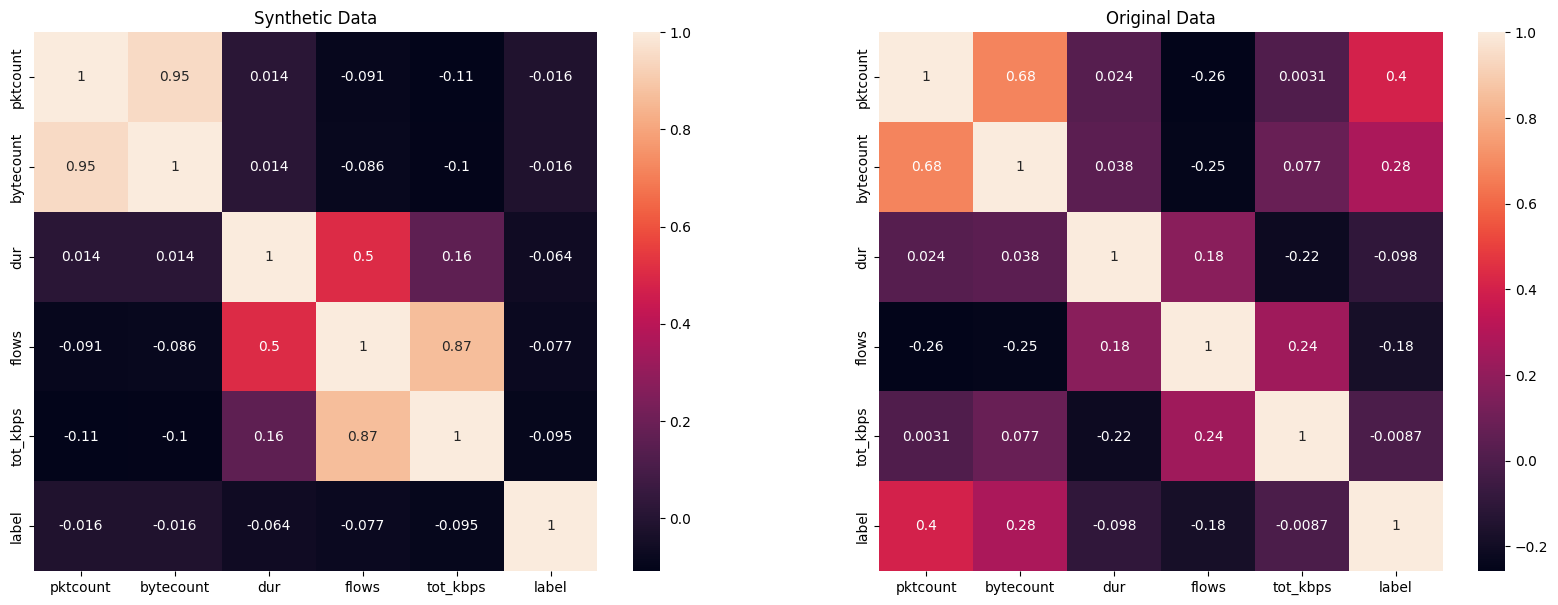

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from matplotlib import pyplot as plt
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,7))
sns.heatmap(df.iloc[:,1:].corr(),annot=True,ax=ax[0]).set_title("Synthetic Data")
sns.heatmap(orig_df[df.columns[1:]].corr(),annot=True,ax=ax[1]).set_title("Original Data")
plt.show()

In [ ]:
labelCompDf = pd.DataFrame()
labelCompDf["original_labels_count"] = orig_df.label.value_counts()
labelCompDf["original_labels%"] = orig_df.label.value_counts(normalize=True)
labelCompDf["sythentic_labels_count"] = df.label.value_counts()
labelCompDf["sythentic_labels%"] = df.label.value_counts(normalize=True)
labelCompDf

,original_labels_count,original_labels%,sythentic_labels_count,sythentic_labels%
0,63561,0.609143,52,0.5
1,40784,0.390857,52,0.5


### Distributions


#### Distibution of Null values in Original Data Set

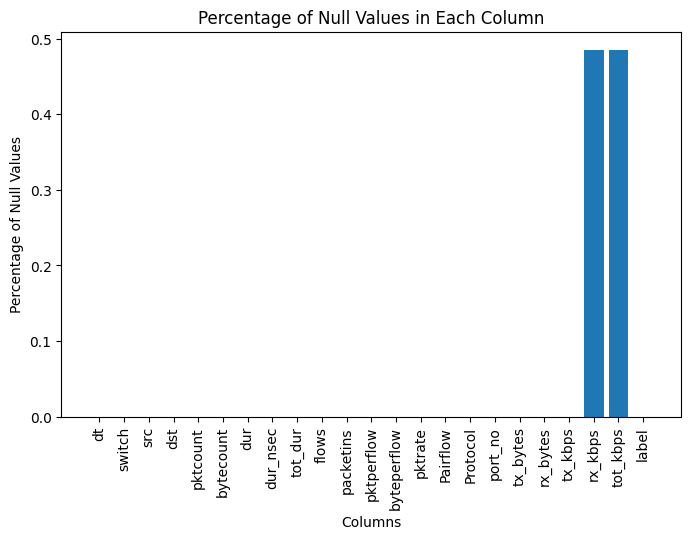

In [ ]:
# Calculate percentage of null values
null_percentage = orig_df.isnull().sum() / orig_df.shape[0] * 100
# Plot
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(null_percentage.index, null_percentage.values)
ax.set_title('Percentage of Null Values in Each Column')
ax.set_ylabel('Percentage of Null Values')
ax.set_xlabel('Columns')
ax.set_xticklabels(null_percentage.index, rotation=90)
plt.show()

#### Distibution of Null values in Synthetic Data Set

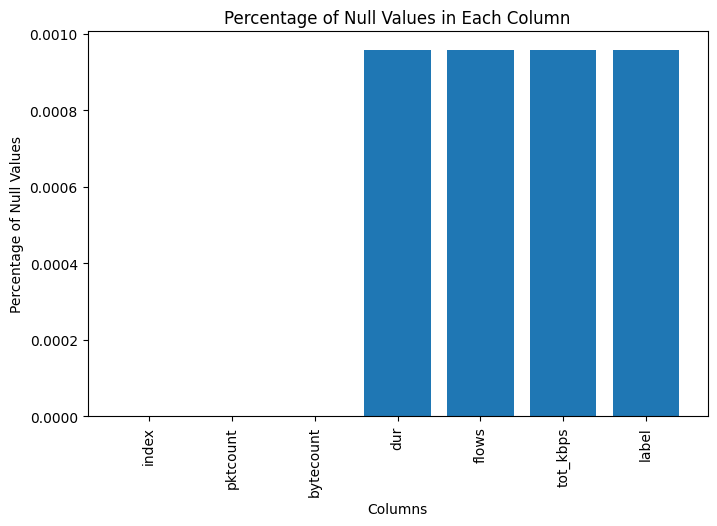

In [ ]:
# Calculate percentage of null values
null_percentage = df.isnull().sum() / orig_df.shape[0] * 100
# Plot
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(null_percentage.index, null_percentage.values)
ax.set_title('Percentage of Null Values in Each Column')
ax.set_ylabel('Percentage of Null Values')
ax.set_xlabel('Columns')
ax.set_xticklabels(null_percentage.index, rotation=90)
plt.show()

#### Packet Count column

In [ ]:
# importing the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# plotting the distributions
plt.figure(figsize=(12,7))
sns.distplot(orig_df['pktcount'], label='Original')
sns.distplot(df['pktcount'], label='Synthesized')
plt.legend()
plt.show()

# checking if the distributions are same or not
from scipy.stats import ks_2samp


In [ ]:
df

,pktcount,bytecount,dur,flows,tot_kbps
0,71737,21891375,1450,15,2090
1,36077,11684418,1065,8,1245
2,81861,73938202,1790,10,9082
3,102025,44589048,1804,12,1022
4,52745,81855976,1401,9,8147
...,...,...,...,...,...
87,63890,98352704,1490,11,7102
88,81796,78801403,1451,10,7298
89,91247,72630201,1403,11,8162
90,91586,84589103,1563,12,9062


In [ ]:
pd.DataFrame(ks_2samp(orig_df['pktcount'], df['pktcount']))

In [ ]:
from scipy.stats import chi2_contingency
observed = pd.crosstab(orig_df['label'], df['label'])

# Perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(observed)

# Print the results
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)

Chi-square statistic: 0.0
P-value: 1.0
Degrees of freedom: 1
Expected frequencies:
[[45.5 45.5]
 [ 0.5  0.5]]


#### Byte count

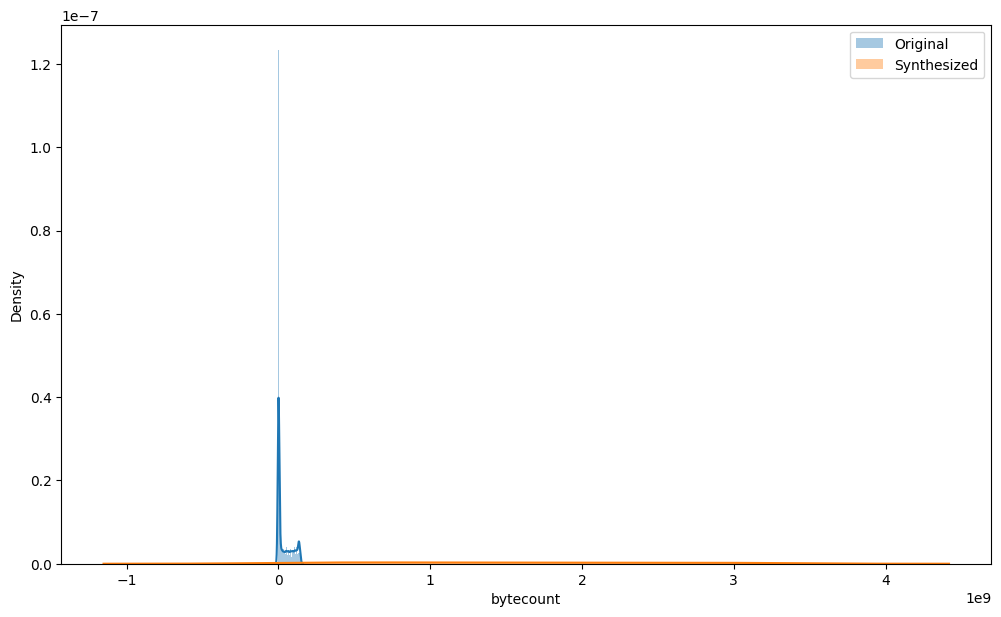

KstestResult(statistic=0.9238095238095239, pvalue=7.96373129899601e-118, statistic_location=147128002.0, statistic_sign=1)

In [ ]:
# importing the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# plotting the distributions
plt.figure(figsize=(12,7))
sns.distplot(orig_df['bytecount'], label='Original')
sns.distplot(df['bytecount'], label='Synthesized')
plt.legend()
plt.show()

# checking if the distributions are same or not
from scipy.stats import ks_2samp
ks_2samp(orig_df['bytecount'], df['bytecount'])

#### Duration

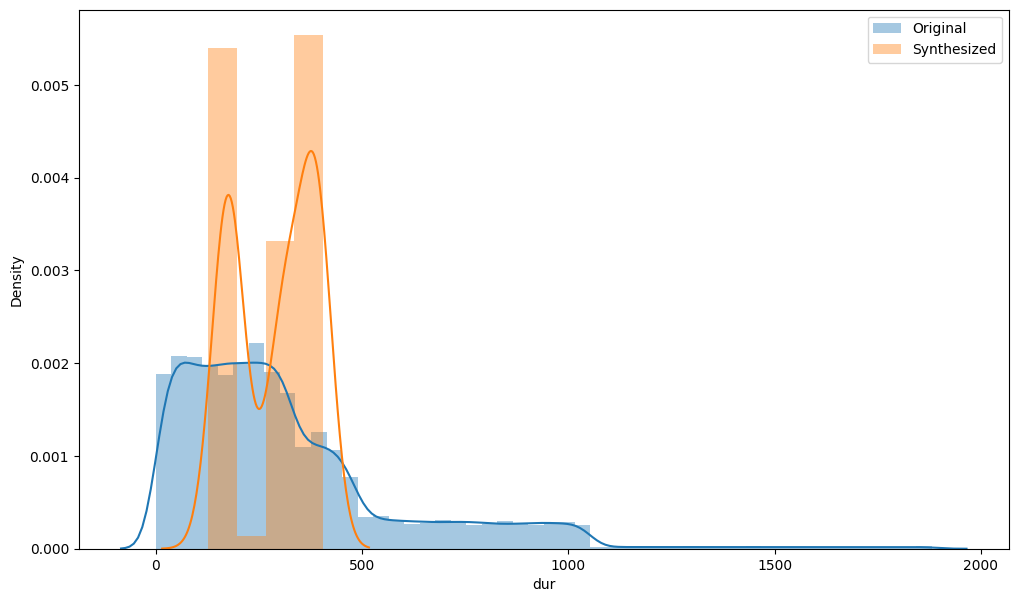

KstestResult(statistic=0.297131995737583, pvalue=1.0298301059842427e-08, statistic_location=154.0, statistic_sign=1)

In [ ]:
# importing the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# plotting the distributions
plt.figure(figsize=(12,7))
sns.distplot(orig_df['dur'], label='Original')
sns.distplot(df['dur'], label='Synthesized')
plt.legend()
plt.show()

# checking if the distributions are same or not
from scipy.stats import ks_2samp
ks_2samp(orig_df['dur'], df['dur'])

#### Flows Column Distribution

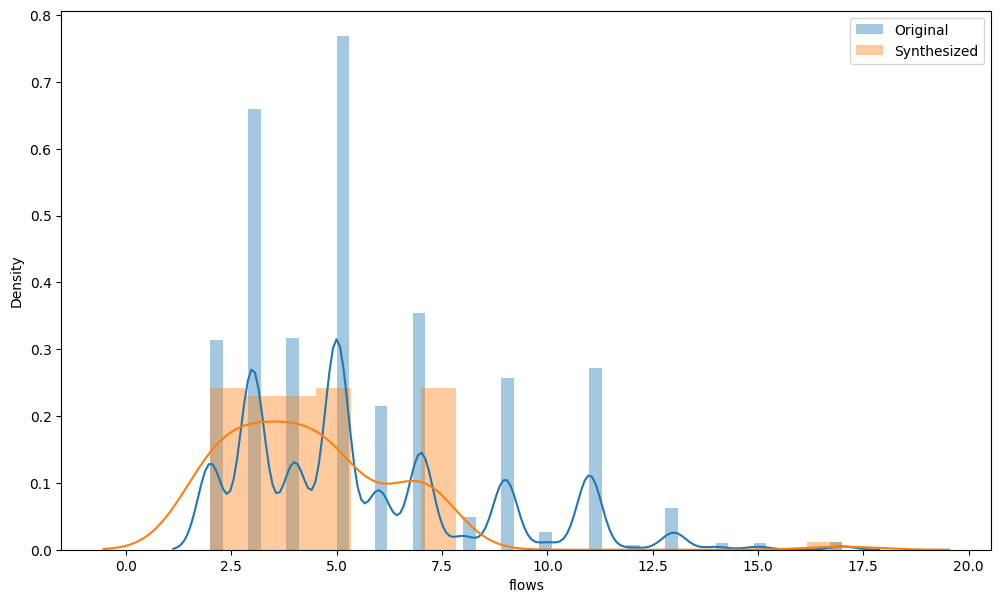

KstestResult(statistic=0.1941106539889424, pvalue=0.0006107992416055407, statistic_location=4.0, statistic_sign=-1)

In [ ]:
# importing the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# plotting the distributions
plt.figure(figsize=(12,7))
sns.distplot(orig_df['flows'], label='Original')
sns.distplot(df['flows'], label='Synthesized')
plt.legend()
plt.show()

# checking if the distributions are same or not
from scipy.stats import ks_2samp
ks_2samp(orig_df['flows'], df['flows'])

#### tot_kbps distribution

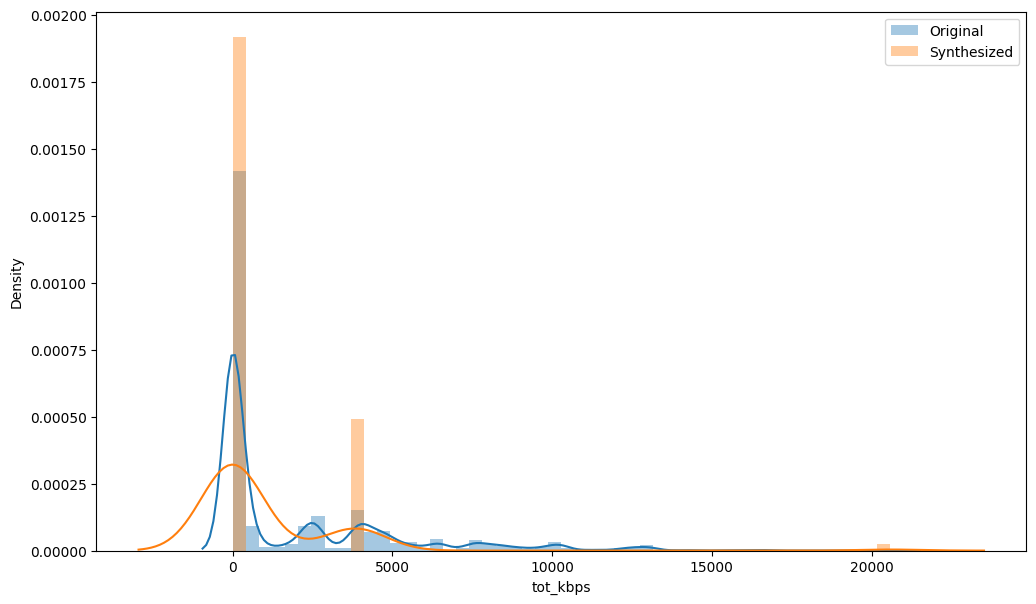

KstestResult(statistic=0.2772387387079035, pvalue=1.2577902805099909e-07, statistic_location=4.0, statistic_sign=-1)

In [ ]:
# importing the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# loading the data
# original_df = pd.read_csv('Original_Data.csv')
# synthesized_df = pd.read_csv('Synthesized_Data.csv')

# plotting the distributions
plt.figure(figsize=(12,7))
sns.distplot(orig_df['tot_kbps'], label='Original')
sns.distplot(df['tot_kbps'], label='Synthesized')
plt.legend()
plt.show()

# checking if the distributions are same or not
from scipy.stats import ks_2samp
ks_2samp(orig_df['tot_kbps'], df['tot_kbps'])

In [ ]:
# Calculate the distribution of both categorical columns

# Calculating distribution of 'label'
labels_dist = orig_df['label'].value_counts(normalize=True)

# Calculating distribution of 'category'
category_dist = df['label'].value_counts(normalize=True)

# Print the result
print('Distribution of label:')
print(labels_dist)

print('Distribution of category:')
print(category_dist)

Distribution of label:
0    0.609143
1    0.390857
Name: label, dtype: float64
Distribution of category:
1.0    0.5
0.0    0.5
Name: label, dtype: float64


#### outliers removal

In [20]:
# Define function to remove outliers  
def remove_outliers(df, col_name):  
    # Calculate Q1, Q3 and IQR  
    Q1 = df[col_name].quantile(0.25)  
    Q3 = df[col_name].quantile(0.75)  
    IQR = Q3 - Q1  
    # Calculate the lower and upper bounds  
    lower_bound = Q1 - 1.5 * IQR  
    upper_bound = Q3 + 1.5 * IQR        
    # Remove the outliers  
    df = df[(df[col_name] > lower_bound) & (df[col_name] < upper_bound)]        
    return df  
df_out = pd.DataFrame()
for col_name in orig_df.columns:
    print(col_name)
    if orig_df[col_name].dtype in [int,float]:
        print(col_name)
        df_out = remove_outliers(orig_df, col_name)
        print(df_out)
df_out

dt
switch
src
dst
pktcount
bytecount
dur
dur_nsec
tot_dur
tot_dur
           dt  switch        src       dst  pktcount  bytecount  dur  \
0       11425       1   10.0.0.1  10.0.0.8     45304   48294064  100   
1       11605       1   10.0.0.1  10.0.0.8    126395  134737070  280   
2       11425       1   10.0.0.2  10.0.0.8     90333   96294978  200   
3       11425       1   10.0.0.2  10.0.0.8     90333   96294978  200   
4       11425       1   10.0.0.2  10.0.0.8     90333   96294978  200   
...       ...     ...        ...       ...       ...        ...  ...   
103834   5262       3   10.0.0.5  10.0.0.7        79       7742   81   
103835   5262       3   10.0.0.5  10.0.0.7        79       7742   81   
103836   5262       3  10.0.0.11  10.0.0.5        31       3038   31   
103837   5262       3  10.0.0.11  10.0.0.5        31       3038   31   
103838   5262       3  10.0.0.11  10.0.0.5        31       3038   31   

         dur_nsec       tot_dur  flows  ...  pktrate  Pairflow  Proto

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103834,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,...,0,0,ICMP,1,15209,12720,1,1.0,2.0,0
103835,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,...,0,0,ICMP,3,15099,14693,1,1.0,2.0,0
103836,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,2,3409,3731,0,0.0,0.0,0
103837,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,1,15209,12720,1,1.0,2.0,0


In [21]:
df_out.to_csv("outlier_removed_data.csv",index=False)

In [24]:
def distribution(df,n_rows=10):
    df = df.drop(["src","dst"],axis=1)
    class_0 = df[df.label == 0]
    class_1 = df[df.label == 1]
    class0_indices = random.sample(range(len(class_0)), n_rows//2)  
    class1_indices = random.sample(range(len(class_1)), n_rows//2)
    class0Df = class_0.iloc[class0_indices] 
    class1Df = class_1.iloc[class1_indices]
    all_rows = ",".join(df.columns.values)+"\n"
    for i,row in class0Df.iterrows():
        all_rows += ",".join([str(i) for i in row.values])+"\n"
    for i,row in class1Df.iterrows():
        all_rows += ",".join([str(i) for i in row.values])+"\n"
    return all_rows

def getStats(df):
    tempDf = pd.DataFrame(df.drop(["src","dst","label"],axis=1).describe()).reset_index()
    all_rows = ",".join(tempDf.columns)+"\n"
    for i,row in tempDf.iterrows():
        all_rows += ",".join([str(i).split(".")[0] for i in row.values])+"\n"
    return all_rows

def chatGPT_Response(user_prompt,max_token):
    max_token = max_token 
    Modified_response = openai.Completion.create(engine ="TD3",prompt=user_prompt,
                                               max_tokens=max_token,temperature=0.5)
    return Modified_response.choices[0].text.lstrip(), Modified_response

In [ ]:
def drop_outliers(df, z_thresh=3):  
    """  
    Drop outliers from all columns of a dataframe using the z-score method.  
    """  
    # Loop through each column  
    for col in df.columns:  
        # Calculate the z-score for each value in the column  
        z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())  
        # Drop rows where the z-score is greater than the threshold  
        df = df[z_scores < z_thresh]  
    return df  